# Carga de Librerias a utilizar

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sqlalchemy import create_engine
from dotenv import load_dotenv
import os

In [3]:
import warnings
warnings.filterwarnings('ignore')

# Funcion de conexión a base de datos

In [4]:
def crear_conexion_mysql():
    load_dotenv('conexion.env')
    # Leer variables de entorno
    username = os.getenv('DB_USERNAME')
    password = os.getenv('DB_PASSWORD')
    hostname = os.getenv('DB_HOST')
    dbname = os.getenv('DB_NAME')
    # Crear la conexión a la base de datos
    engine = create_engine(f'mysql+mysqlconnector://{username}:{password}@{hostname}/{dbname}')
    return engine

# Carga de datos

In [5]:
#Opción 1 Lectura de datos en crudo
#df_acceso_por_tecnologia=pd.read_excel('../DatasetCrudos/Internet.xlsx',sheet_name='Accesos Por Tecnología')

#Opción 2 Lectura de datos de base de datos
engine = crear_conexion_mysql()
df_acceso_por_tecnologia = pd.read_sql_table('internet_accesos_tecnologia', con=engine)


# Identificación de tipo de variables

Para analizar los datos primero los tengo que explorar, conocer las variables y para esto grafico las variables cuantitativas y las variables cualitativas.

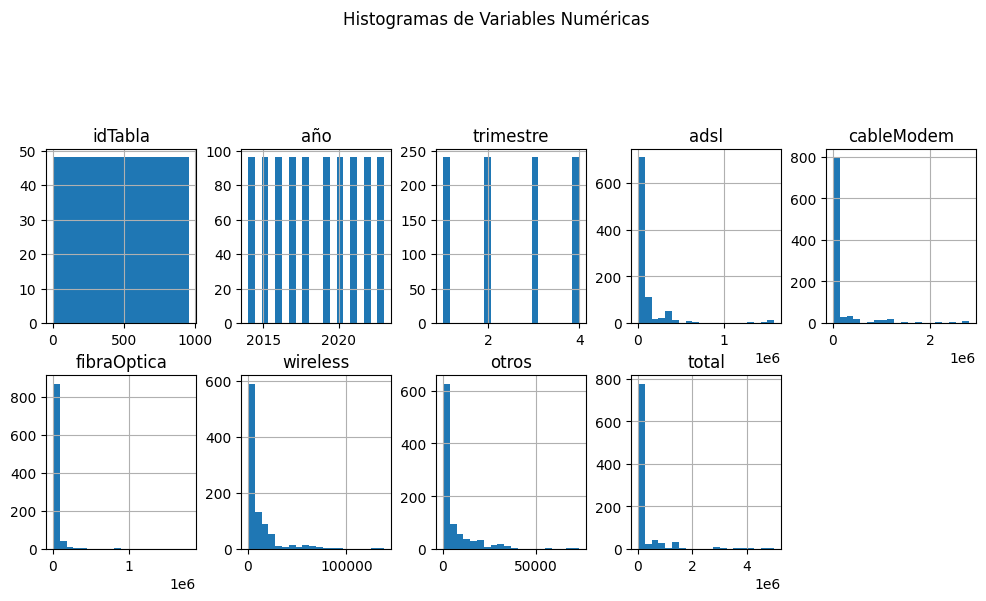

In [6]:

df_acceso_por_tecnologia
df_acceso_por_tecnologia.hist(bins=20, figsize=(12, 14), layout=(5, 5))
plt.suptitle('Histogramas de Variables Numéricas')
plt.show()

Podemos observar la existencia de 6 variables numéricas,y observamos que en la variable cablemodem se sitúa el mayor número de accesos seguido de fibra óptica y ADSL, son cantidades alrededor de millones.

Graficamos las variables cualitativas para para darme contexto sobre los valores que hay

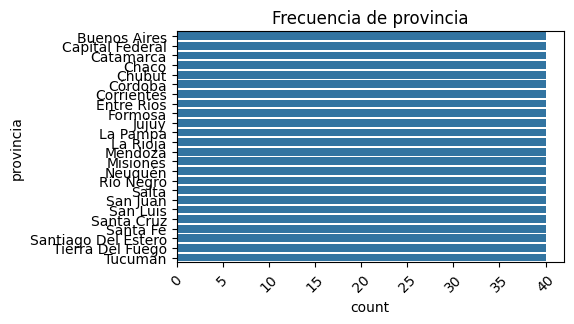

In [7]:
categorical_columns = df_acceso_por_tecnologia.select_dtypes(include=['object']).columns

for col in categorical_columns:
    plt.figure(figsize=(5, 3))
    sns.countplot(df_acceso_por_tecnologia[col], order=df_acceso_por_tecnologia[col].value_counts().index)
    plt.title(f'Frecuencia de {col}')
    plt.xticks(rotation=45)
    plt.show()

In [8]:
df_acceso_por_tecnologia.columns

Index(['idTabla', 'año', 'trimestre', 'provincia', 'adsl', 'cableModem',
       'fibraOptica', 'wireless', 'otros', 'total'],
      dtype='object')

# Identificación de Outlayers

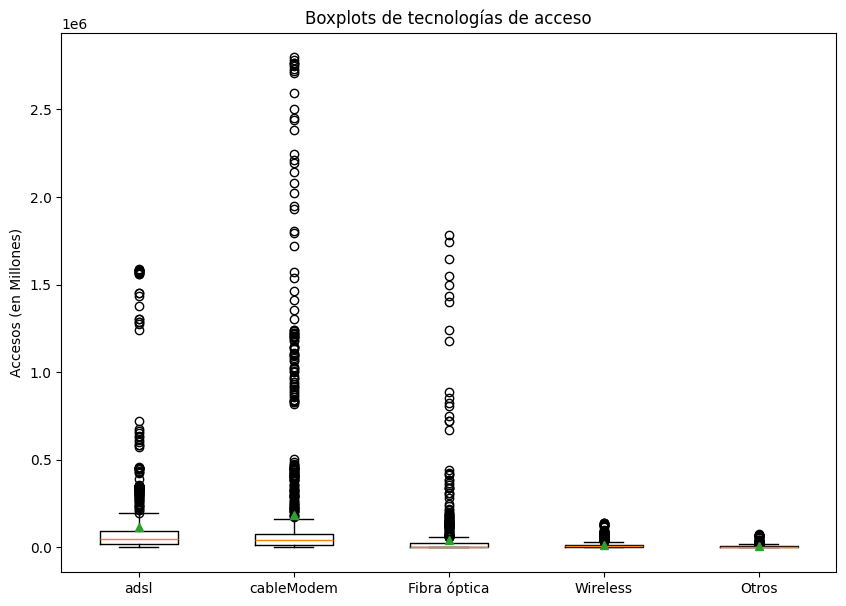

In [9]:
# Crear un gráfico de boxplots para varias columnas
plt.figure(figsize=(10, 7))
# Pasar los datos de las columnas como una lista a plt.boxplot
plt.boxplot([df_acceso_por_tecnologia['adsl'], df_acceso_por_tecnologia['cableModem'], df_acceso_por_tecnologia['fibraOptica'], df_acceso_por_tecnologia['wireless'],df_acceso_por_tecnologia['otros']],showmeans=True)
# Configurar los nombres de las etiquetas en el eje x
plt.xticks([1, 2, 3, 4,5], ['adsl', 'cableModem', 'Fibra óptica','Wireless', 'Otros'])
# Títulos y etiquetas
plt.title("Boxplots de tecnologías de acceso")
plt.ylabel("Accesos (en Millones)")

# Mostrar el gráfico
plt.show()

In [10]:
df_acceso_por_tecnologia['adsl'].describe()
#df_acceso_por_tecnologia['Cablemodem'].describe()
#df_acceso_por_tecnologia['Cablemodem'].mean() # 181,634.990625
#df_acceso_por_tecnologia['Cablemodem'].median()# 39,670

count    9.600000e+02
mean     1.171007e+05
std      2.411026e+05
min      3.296000e+03
25%      2.123025e+04
50%      4.547550e+04
75%      9.190500e+04
max      1.586340e+06
Name: adsl, dtype: float64

Podemos observar que en promedio hay alrededor de 50 000 accesos por tecnología, siendo 100 000 accesos aproximandamente el valor  en el que cae el 75% de los conteos en ADSL y Cablemodem
En ADSL, Cablemodem y fibra óptica se presentan outlayers que afectan el promedio


# Realización de agrupaciones para obtener hallazgos

Agrupamos el total por Provincia para obtener el top 3 de accesos

In [11]:
total_por_provincia=df_acceso_por_tecnologia.groupby('provincia')['total'].sum().sort_values(ascending=False)

In [12]:
# Calculo porcentajes por provincia
porcentaje = (total_por_provincia / total_por_provincia.sum()) * 100

# Agregar los porcentajes como una nueva columna en el DataFrame resultante
df_resultante = pd.DataFrame({'Total': total_por_provincia, 'Porcentaje': porcentaje})

# Mostrar el DataFrame resultante
print(df_resultante)

                           Total  Porcentaje
provincia                                   
Buenos Aires         147835500.0   42.594132
Capital Federal       56572290.0   16.299519
Córdoba               31582101.0    9.099385
Santa Fe              28435892.0    8.192904
Entre Ríos             8663679.0    2.496166
Mendoza                8509857.0    2.451847
Tucumán                7604562.0    2.191014
Salta                  5932645.0    1.709304
Misiones               5106448.0    1.471262
Río Negro              4999304.0    1.440392
Neuquén                4987936.0    1.437116
Chaco                  4396177.0    1.266620
Corrientes             4366938.0    1.258195
Chubut                 4223897.0    1.216983
La Pampa               3467161.0    0.998953
Santiago Del Estero    3301531.0    0.951232
Jujuy                  2993572.0    0.862503
San Luis               2897133.0    0.834717
San Juan               2774759.0    0.799459
La Rioja               1939797.0    0.558891
Formosa   

Ahora vamos al detalle para ver si se tiene algun cambio por lo que Agrupamos por provincia y tipo de tecnología

In [13]:
"""_summary_
'ADSL', 'Cablemodem', 'Fibra óptica','Wireless', 'Otros', 'Total'
"""
df_adsl=df_acceso_por_tecnologia.groupby('provincia')['adsl'].sum().sort_values(ascending=False)
df_adsl.head(3)

provincia
Buenos Aires       41918158.0
Capital Federal    12201414.0
Santa Fe           11383648.0
Name: adsl, dtype: float64

In [14]:
df_cable=df_acceso_por_tecnologia.groupby('provincia')['cableModem'].sum().sort_values(ascending=False)
df_cable.head(3)

provincia
Buenos Aires       77949490.0
Capital Federal    41280690.0
Córdoba            14510148.0
Name: cableModem, dtype: float64

In [15]:
df_fibra=df_acceso_por_tecnologia.groupby('provincia')['fibraOptica'].sum().sort_values(ascending=False)
df_fibra.head(10)

provincia
Buenos Aires       23481021.0
Córdoba             4192040.0
Santa Fe            2850957.0
Capital Federal     2159731.0
Tucumán             1892356.0
Mendoza             1727370.0
Salta                696926.0
Chaco                609883.0
Río Negro            567786.0
Entre Ríos           552649.0
Name: fibraOptica, dtype: float64

In [16]:
df_wireless=df_acceso_por_tecnologia.groupby('provincia')['wireless'].sum().sort_values(ascending=False)
df_wireless.head(3)

provincia
Buenos Aires    2826533.0
San Luis        1457374.0
Córdoba         1203082.0
Name: wireless, dtype: float64

# Cálculo de porcentajes de participación
Calculé los porcentajes para ver la participación de San Luis que toma un segundo lugar por tipo de tecnología wireless

In [17]:
df_wl=df_acceso_por_tecnologia.groupby('provincia')['wireless'].sum().sort_values(ascending=False)
# Calcular los porcentajes
porcentaje = (df_wl / df_wl.sum()) * 100
# Agregar los porcentajes como una nueva columna en el DataFrame resultante
df_resultante = pd.DataFrame({'Total': df_wl, 'Porcentaje': porcentaje})
# Mostrar el DataFrame resultante
print(df_resultante)

                         Total  Porcentaje
provincia                                 
Buenos Aires         2826533.0   24.390979
San Luis             1457374.0   12.576106
Córdoba              1203082.0   10.381746
Santa Fe              905482.0    7.813669
Chubut                744027.0    6.420426
Neuquén               636933.0    5.496281
Entre Ríos            600835.0    5.184781
Mendoza               457873.0    3.951120
La Pampa              454528.0    3.922255
Formosa               371079.0    3.202149
Río Negro             364320.0    3.143824
San Juan              311268.0    2.686023
Santa Cruz            204379.0    1.763646
Chaco                 152864.0    1.319108
Corrientes            152249.0    1.313801
Capital Federal       147906.0    1.276324
Salta                 140368.0    1.211276
Misiones              132685.0    1.144978
Santiago Del Estero   125045.0    1.079050
La Rioja               74424.0    0.642226
Jujuy                  53425.0    0.461020
Tucumán    

Al ver el total del acceso por tecnologia la primer impresión es que el top 3 son:
Buenos Aires con el 42% (147 835 485.0 )<br>
Capital Federal con el 16% (56572289.0)<br>
Córdoba con el 9% (31582106.0)<br>
de el acceso no tomando en cuenta la tecnologia por la cual son los accesos.

-Llama la atención San Luis, que toma el segundo lugar cuando el tipo de tecnologia es wireless con el 12 % 

In [18]:
agrupacion=df_acceso_por_tecnologia.groupby(['provincia','año'])['total'].sum().sort_values(ascending=False)
type(agrupacion)

pandas.core.series.Series

# Graficamos para ver de manera general las provincias con sus accesos por año

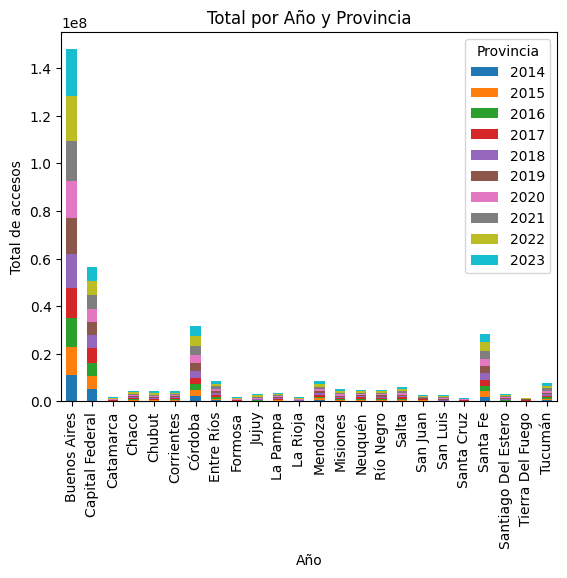

In [19]:
# Graficar los datos agrupados
agrupacion.unstack().plot(kind='bar', stacked=True)

# Configuración del gráfico
plt.title('Total por Año y Provincia')
plt.xlabel('Año')
plt.ylabel('Total de accesos')
plt.legend(title='Provincia', loc='upper right')

# Mostrar el gráfico
plt.show()

Podemos ver que las provincias que destacan en el número de accesos de manera General a través de los años

In [20]:
agrupacion.index
agrupacion.values

array([19686280., 18738930., 16953120., 15456140., 15248850., 14223040.,
       12507870., 12217100., 11633770., 11170400.,  6151920.,  6053920.,
        5948760.,  5614530.,  5605550.,  5537040.,  5517270.,  5463520.,
        5421300.,  5258480.,  4266350.,  4118570.,  3775319.,  3591941.,
        3524839.,  3417740.,  3374752.,  3172861.,  3108984.,  3010665.,
        2890196.,  2780068.,  2705460.,  2523986.,  2464964.,  2455771.,
        2319725.,  2245313.,  2201235.,  2069254.,  1188068.,  1140755.,
        1136374.,  1077211.,  1057594.,  1035016.,  1026650.,   972120.,
         954835.,   945403.,   936074.,   872188.,   840272.,   824034.,
         821719.,   815232.,   811093.,   807877.,   783624.,   774451.,
         742252.,   718747.,   716379.,   714580.,   714128.,   701108.,
         682983.,   682613.,   682133.,   681184.,   672252.,   670190.,
         668970.,   659612.,   651058.,   639788.,   635223.,   634988.,
         634615.,   630526.,   602868.,   598285., 

In [21]:
# Desempaquetar el índice multinivel
df_unstacked = agrupacion.unstack(level=0)

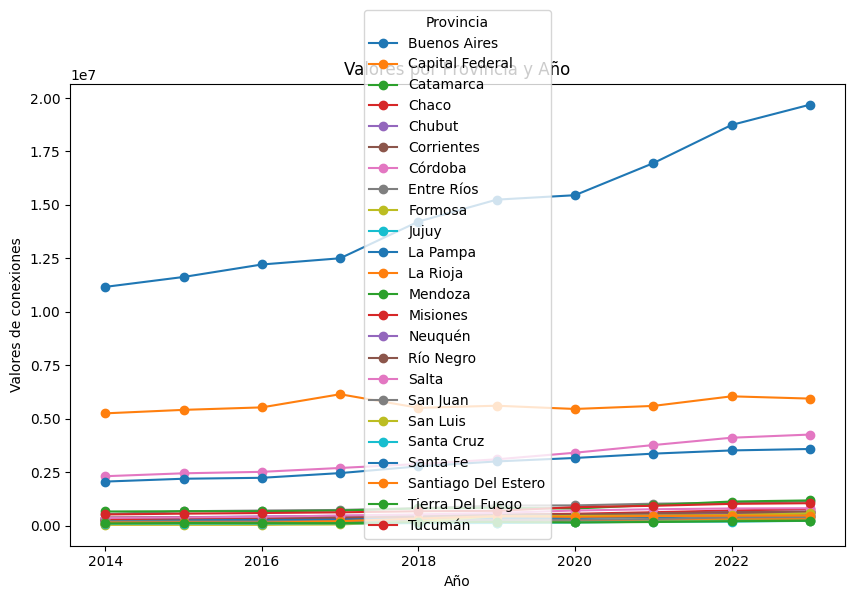

In [22]:
# Crear la figura y el eje
plt.figure(figsize=(10, 6))

# Graficar cada provincia en la misma gráfica
for columna in df_unstacked.columns:
    plt.plot(df_unstacked.index, df_unstacked[columna], marker='o', linestyle='-', label=columna)

# Configurar el título y las etiquetas
plt.title('Valores por Provincia y Año')
plt.xlabel('Año')
plt.ylabel('Valores de conexiones')
plt.legend(title='Provincia')

# Mostrar la gráfica
plt.show()

De acuerdo a la grafica solo en 4 provincias hay crecimiento año con año, las demás provincias quedan casi constantes.<br>
Hay un leve crecimiento en Tucumán y Mendoza a partir de 2020

Ahora exploraremos la correlación entre variables númericas

In [23]:
df_acceso_por_tecnologia.columns

Index(['idTabla', 'año', 'trimestre', 'provincia', 'adsl', 'cableModem',
       'fibraOptica', 'wireless', 'otros', 'total'],
      dtype='object')

In [24]:
df_acceso_por_tecnologia.head(3)

,idTabla,año,trimestre,provincia,adsl,cableModem,fibraOptica,wireless,otros,total
0,1,2023,4,Buenos Aires,223391.0,2797700.0,1784590.0,137993.0,67943.0,5011620.0
1,2,2023,4,Capital Federal,58700.0,1198840.0,182520.0,4492.0,29820.0,1474370.0
2,3,2023,4,Catamarca,6669.0,11016.0,55437.0,1384.0,81.0,74587.0


In [25]:
selected_columns = ['año', 'trimestre', 'adsl', 'cableModem','fibraOptica', 'wireless', 'otros']
#new_df = df[selected_columns]
df_numerico=df_acceso_por_tecnologia[selected_columns]
df_numerico.columns

Index(['año', 'trimestre', 'adsl', 'cableModem', 'fibraOptica', 'wireless',
       'otros'],
      dtype='object')

# Correlaciones

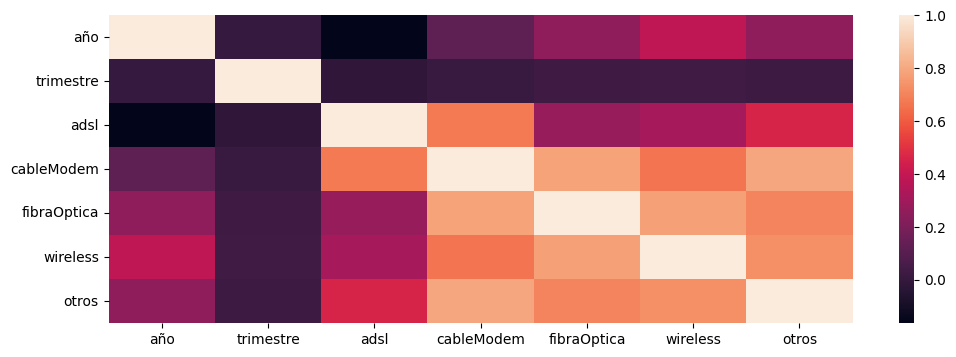

In [26]:
plt.figure(figsize = (12,4)) 
sns.heatmap(df_numerico.corr()) 
plt.show()

Podemos apreciar que si hay una correlación entre cableModem con adsl y fibra óptica con adsl

In [27]:
# tecnologia vs año
sns.set(style="whitegrid")

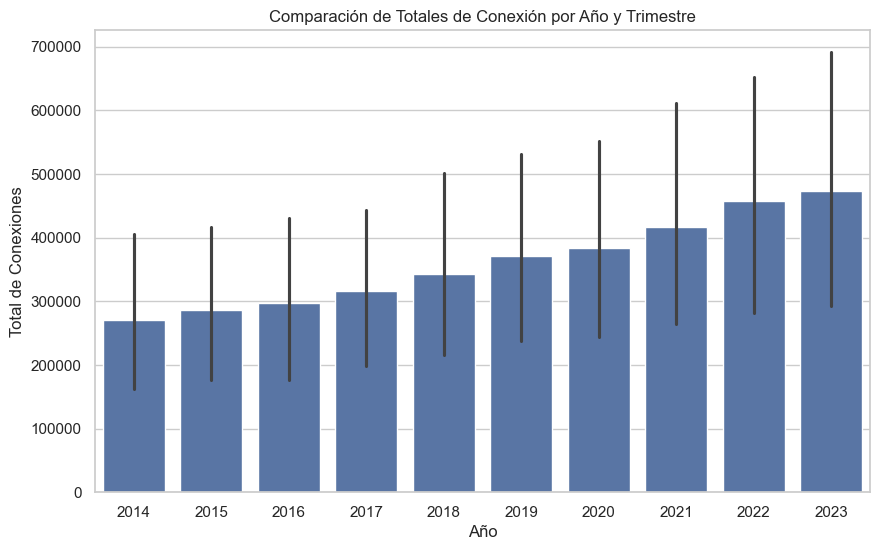

In [29]:
# Crear la gráfica de barras
plt.figure(figsize=(10, 6))
sns.barplot(x='año', y='total', data=df_acceso_por_tecnologia)

# Configurar los títulos y etiquetas
plt.title('Comparación de Totales de Conexión por Año y Trimestre')
plt.xlabel('Año')
plt.ylabel('Total de Conexiones')

# Mostrar la leyenda
#plt.legend(title='Trimestre')

# Mostrar la gráfica
plt.show()

El crecimiento en una decada ha sido de un 70% en las conexiones a internet.

In [30]:
# Datos de población para los años correspondientes
data_poblacion = {
    'año': [2014,2015,2016,2017, 2018, 2019, 2020, 2021, 2022, 2023,2024],
    'Población': [43039973,43469697,43863091,44242752,44581294, 44907160, 45163072, 45389441, 45630050, 45916347,46065111]
}
df_poblacion = pd.DataFrame(data_poblacion)

In [31]:
# Calcular el porcentaje de aumento de la población respecto al año anterior
df_poblacion['Porcentaje_Aumento'] = df_poblacion['Población'].pct_change() * 100
df_poblacion

,año,Población,Porcentaje_Aumento
0,2014,43039973,NaN
1,2015,43469697,0.998430
2,2016,43863091,0.904984
3,2017,44242752,0.865559
4,2018,44581294,0.765192
5,2019,44907160,0.730948
6,2020,45163072,0.569869
7,2021,45389441,0.501226
8,2022,45630050,0.530099
9,2023,45916347,0.627431


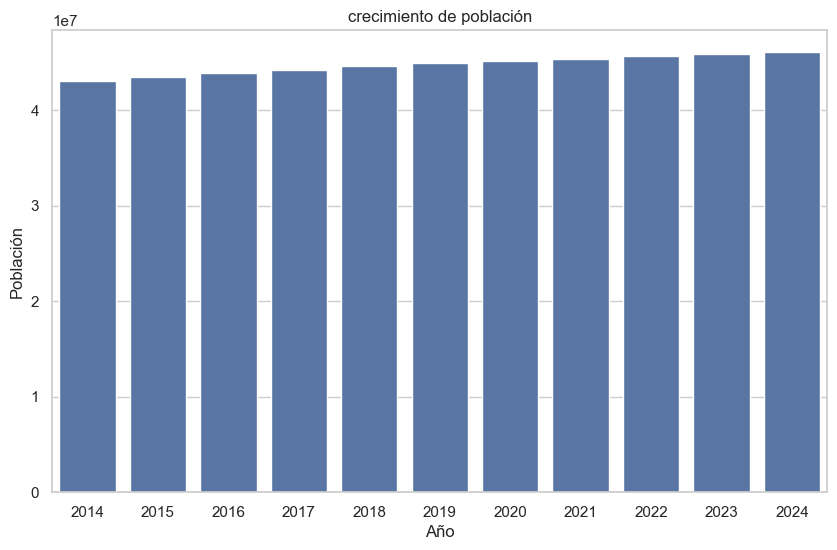

In [32]:
# Crear la gráfica de barras
plt.figure(figsize=(10, 6))
sns.barplot(x='año', y='Población', data=df_poblacion)

# Configurar los títulos y etiquetas
plt.title('crecimiento de población')
plt.xlabel('Año')
plt.ylabel('Población')

# Mostrar la gráfica
plt.show()

Ha crecido un 7% la población en Argentina en 10 años

# Cruce de información

In [33]:
# Merge de los DataFrames
df_conexiones = df_acceso_por_tecnologia.merge(df_poblacion, on='año', how='left')

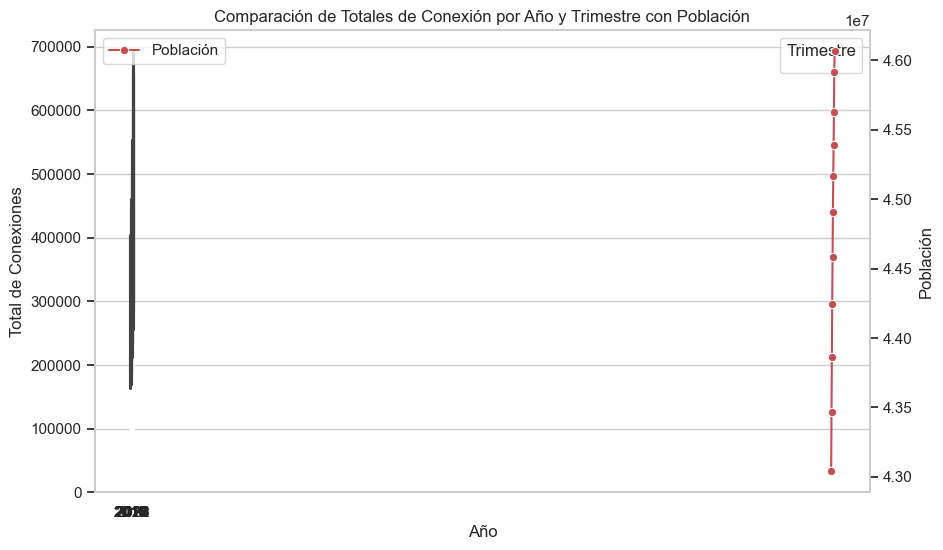

In [34]:
# Crear la figura y los ejes
fig, ax1 = plt.subplots(figsize=(10, 6))

# Crear la gráfica de barras para los totales de conexión
sns.barplot(x='año', y='total', data=df_conexiones, ax=ax1)

# Configurar los títulos y etiquetas
ax1.set_title('Comparación de Totales de Conexión por Año y Trimestre con Población')
ax1.set_xlabel('Año')
ax1.set_ylabel('Total de Conexiones')

# Crear un segundo eje y agregar la población
ax2 = ax1.twinx()
sns.lineplot(x='año', y='Población', data=df_poblacion, ax=ax2, color='r', marker='o')

# Configurar las etiquetas para el segundo eje
ax2.set_ylabel('Población')
ax2.grid(False)  # Opcional: desactivar el grid del segundo eje

# Mostrar la leyenda
ax1.legend(title='Trimestre')
ax2.legend(['Población'], loc='upper left')

# Mostrar la gráfica
plt.show()

Puedo ver que las escalas no son las correctas 

In [35]:
df_anio_total=df_acceso_por_tecnologia.groupby(['año'])['total'].sum().pct_change()*100
df_anio_total

año
2014         NaN
2015    5.438794
2016    3.720809
2017    6.438203
2018    8.695856
2019    7.880229
2020    3.388262
2021    9.015582
2022    9.468406
2023    3.569645
Name: total, dtype: float64

In [36]:
df_anio_total.mean()

np.float64(6.401753901014762)

Aqui podemos ver el crecimiento en porcentaje con respecto al año anterior siendo 2018, 2019, 2021 y 2022 los años con más crecimiento en conexiones por lo que podemos ver que hay un crecimiento del 6.4% anual 

In [37]:
df_acceso_por_tecnologia.columns

Index(['idTabla', 'año', 'trimestre', 'provincia', 'adsl', 'cableModem',
       'fibraOptica', 'wireless', 'otros', 'total'],
      dtype='object')

In [38]:

df_grouped = df_acceso_por_tecnologia.groupby('año').sum().reset_index()
df_grouped

,año,idTabla,trimestre,provincia,adsl,cableModem,fibraOptica,wireless,otros,total
0,2014,87600,240,Buenos AiresCapital FederalCatamarcaChacoChubu...,14884743.0,9975095.0,604862.0,305234.0,286700.0,26056641.0
1,2015,78384,240,Buenos AiresCapital FederalCatamarcaChacoChubu...,15115699.0,11162966.0,620877.0,331431.0,242846.0,27473808.0
2,2016,69168,240,Buenos AiresCapital FederalCatamarcaChacoChubu...,15073818.0,12177094.0,680127.0,337396.0,227633.0,28496056.0
3,2017,59952,240,Buenos AiresCapital FederalCatamarcaChacoChubu...,14639298.0,14148066.0,766312.0,432844.0,344162.0,30330690.0
4,2018,50736,240,Buenos AiresCapital FederalCatamarcaChacoChubu...,13981988.0,16571268.0,1079124.0,870047.0,465760.0,32968203.0
5,2019,41520,240,Buenos AiresCapital FederalCatamarcaChacoChubu...,12188864.0,18754968.0,2450177.0,1262831.0,909341.0,35566173.0
6,2020,32304,240,Buenos AiresCapital FederalCatamarcaChacoChubu...,9072828.0,20539974.0,4636620.0,1563813.0,958018.0,36771248.0
7,2021,23088,240,Buenos AiresCapital FederalCatamarcaChacoChubu...,7802044.0,22877018.0,6473502.0,1927038.0,1006793.0,40086390.0
8,2022,13872,240,Buenos AiresCapital FederalCatamarcaChacoChubu...,5712223.0,24122055.0,10874928.0,2232136.0,940575.0,43881932.0
9,2023,4656,240,Buenos AiresCapital FederalCatamarcaChacoChubu...,3945211.0,24041099.0,14324289.0,2325666.0,812089.0,45448361.0


# Tendencias

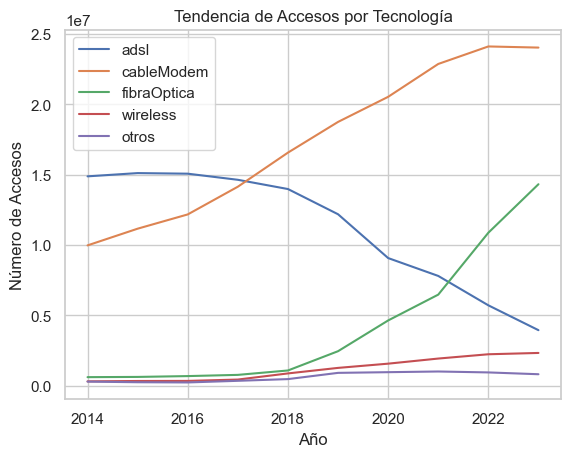

In [39]:
plt.plot(df_grouped['año'],df_grouped['adsl'],label='adsl') 
plt.plot(df_grouped['año'],df_grouped['cableModem'],label='cableModem') 
plt.plot(df_grouped['año'],df_grouped['fibraOptica'],label='fibraOptica') 
plt.plot(df_grouped['año'],df_grouped['wireless'],label='wireless') 
plt.plot(df_grouped['año'],df_grouped['otros'],label='otros') 
plt.xlabel('Año')
plt.ylabel('Número de Accesos')
plt.title('Tendencia de Accesos por Tecnología')
plt.legend()

# Mostrar la gráfica
plt.grid(True)
plt.show()


Agrupamos los datos por año y vemos que cable-modem y fibra óptica son tecnologias que van al alza mientras que asdl sólo va a la baja.

Es interesanta ver que asdl va a la baja.

Asi que una sugerencia puede ser entrar al mercado con cable-modem y fibra óptica

Referencias
https://populationtoday.com/ar-argentina/